# TP1: How to handle datasets and probability distributions - Part B: Continuous Random Variables

In this second part of the TP, we are working with continuous variables. 

The Iris dataset is one of the most famous datasets in machine learning and statistics. The dataset consists of 150 samples from three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Each sample includes measurements of four features: the length and the width of the sepals and petals, in centimeters. We will use only the 2 first features, $x$ refering to the sepal length and $y$ to the sepal width. 

No other libraries than the ones provided should be used. Submit your TP modifying both jupyter notebooks with your surname and the number of the TP (ex: Reyes_TP1b.ipynb). The TP must be completed individually and submitted before 11/03/2024 at 23:59.

In [1]:
from utils import get_density, density_eval2d, density_eval1d, plot_density, plot_density1d, get_grid, get_delta
from sklearn import datasets
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
data = iris['data']
X = data[..., :2]
x, y = X[..., 0], X[..., 1]

## Problem setting

We approximated the joint density $p(x, y)$ utilizing kernel density estimation (KDE). However, You do not need to understand KDE for this TP. The only thing you need to know is that we lack a closed-form formula. So we can only evaluate the density, and we can do so at any point.

Therefore, our approach will consists in evaluating a grid of points and using the discrete approximation of integration $\int f(x) dx \approx \sum f(x)\Delta x$.

The file utils.py contains some functions. Have a look at it, it can help you to complete the TP. 

## 0. Joint density $p(x, y)$


In [2]:
# `density` is a sklearn object, with a method `score_sample` that evaluate the functions at the given points. 
density = get_density(x, y)

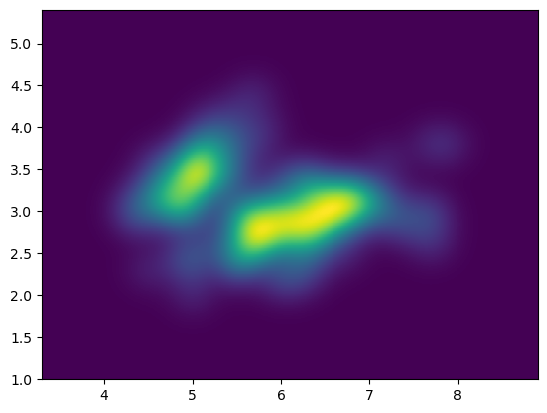

In [3]:
# Get the a grid (n_points x n_points)
n_points = 500
x_grid, y_grid = get_grid(x.min()-1, x.max()+1, y.min()-1, y.max()+1, n_points)

# Evaluate the density at each point of the grid. 
p_xy = density_eval2d(density, x_grid, y_grid)

# Visualize the density 
plot_density(x_grid, y_grid, p_xy)

We have now a grid of estimates of $p(x, y)$. However, these estimates yield an unnormalized discretization of the density function. To normalize the density function, we need to compute the small intervals $\Delta_x$ and $\Delta_y$ between each estimates (or more precisely the estimates are the middle points of the small intervals, so that you have $n$ intervals instead of $n-1$). That is what we do with the function `get_delta`. 

By normalizing our estimates with the deltas, we obtain an proper approximate probability function. Therefore, we can use the discrete approximation to verify that $\int_x\int_y p(x, y) dydx = 1 \approx \sum_{i=1}^{N_x} \sum_{j=1}^{N_y} p(x_i, y_j)\Delta_y\Delta_x$. 

In [4]:
# We observe that the grid of estimate is not a probability function since it does not sum up to one. 
p_xy.sum()

10105.559993507835

In [5]:
# Normalizing with the deltas
delta_x = get_delta(x_grid.min(), x_grid.max(), n_points)
delta_y = get_delta(y_grid.min(), y_grid.max(), n_points)
(p_xy*delta_x*delta_y).sum()

0.9999919929479449

## 1. Marginal densities $p(x)$ and $p(y)$

Following the same strategy, we want to evaluate the marginal densities $p(x)$ and $p(y)$. You can use the variables previously computed.  

_Write here the formula and the approximations that you implement_

The formula of the marginal densitie $p(x)$ is given by:

$p(x) = \int_y p(x, y)dy \approx \sum_{i=1}^{N_y} p(x, y) \Delta_y$


Use your evaluation grid of the joint and the deltas to compute the marginals. Verify and the marginals are indeed probability functions. 

(500,)
(500,)
(500, 500)
(150,)
(150,)


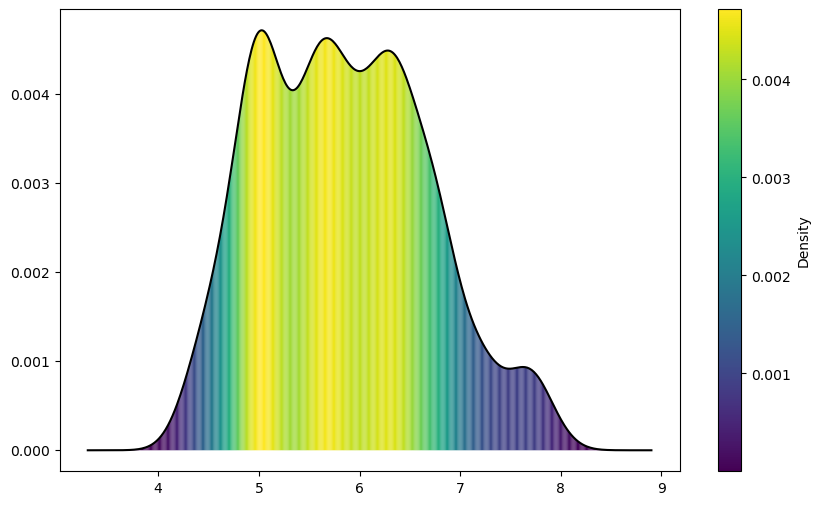

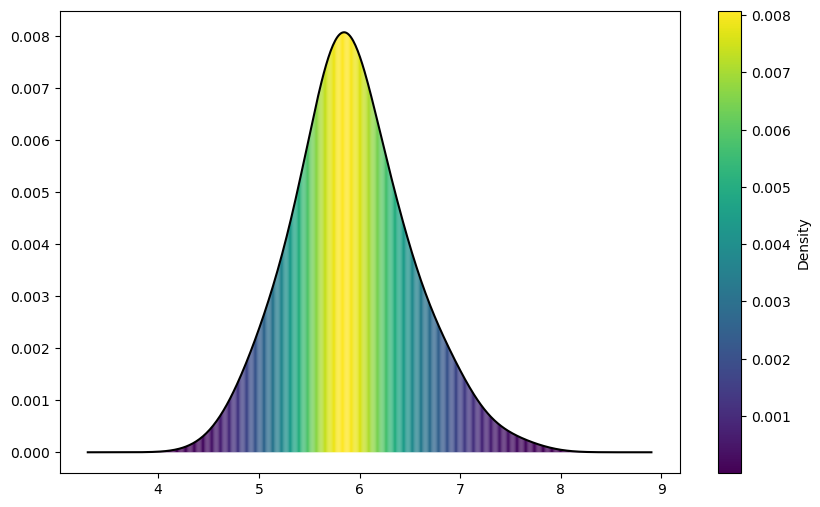

In [18]:
# Complete the code here

p_y = (p_xy * delta_x * delta_y).sum(axis=0)
p_x = (p_xy * delta_x * delta_y).sum(axis=1)

print(p_x.shape)
print(p_y.shape)
print(x_grid.shape)
print(x.shape)
print(y.shape)
plot_density1d(np.linspace(x.min() - 1, x.max() + 1, n_points), p_y)
plot_density1d(np.linspace(x.min() - 1, x.max() + 1, n_points), p_x)


Use the `plot_density1d` function to plot the marginals 

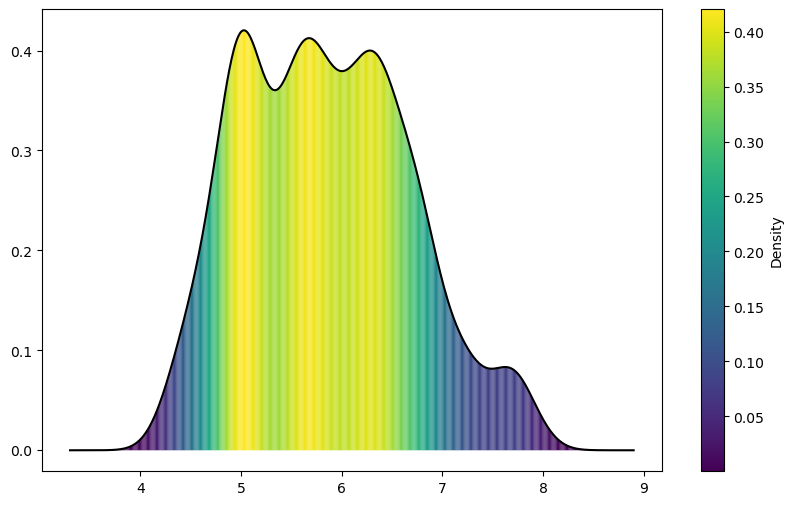

In [73]:
# Fill the function with the arguments to plot p(x)
plot_density1d()

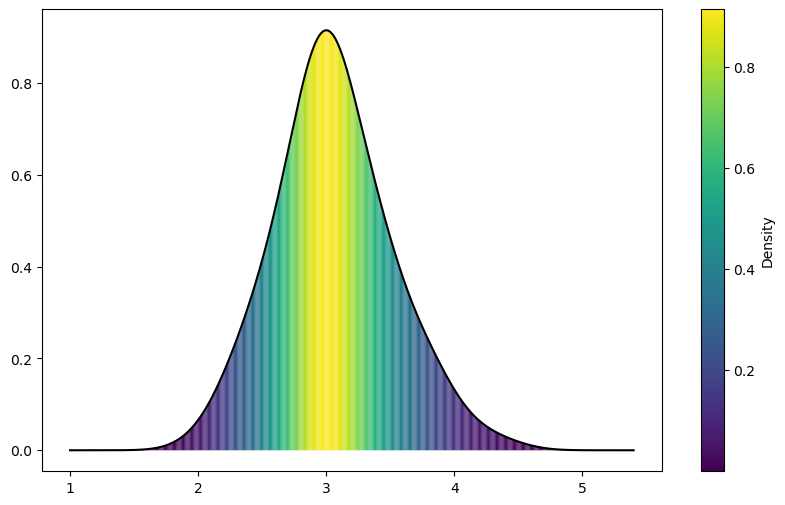

In [74]:
# Fill the function with the arguments to plot p(y)
plot_density1d()

## 2. Conditional densities  $𝑝(𝑥|y)$ and  $𝑝(𝑦|x)$
 

We now want to approximate the conditional densities using a similar approach.
We need a function that evaluates the function for any given conditioning value (not only the ones included in the previous grid). 

First, write a function that returns a 2d-array (2 x n_points) corresponding to the points where we are going to evaluate the function to approximate the conditional density. 
Hint: You may need an `if` statement to address the conditioning in the 2 directions. 


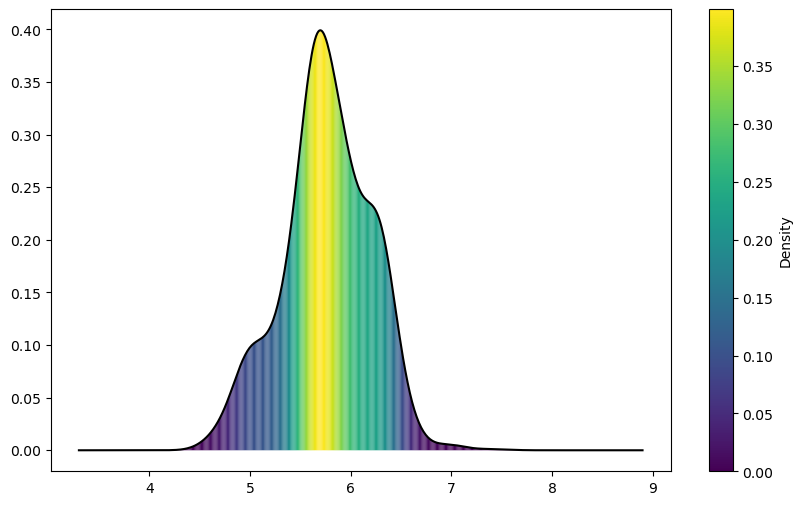

KernelDensity(bandwidth=0.2)


In [23]:
# Write your function here

def my_function(x_min: float, x_max: float, y_min: float, y_max: float, n_points: int) -> np.ndarray:
    return np.array([np.linspace(x_min, x_max, n_points), np.linspace(y_min, y_max, n_points)])

points = my_function(x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1, n_points)
plot_density1d(points[0], density_eval1d(density, points))

Use your function to evaluate the conditional density at the point $y = 4$ and $x = 5.5$.

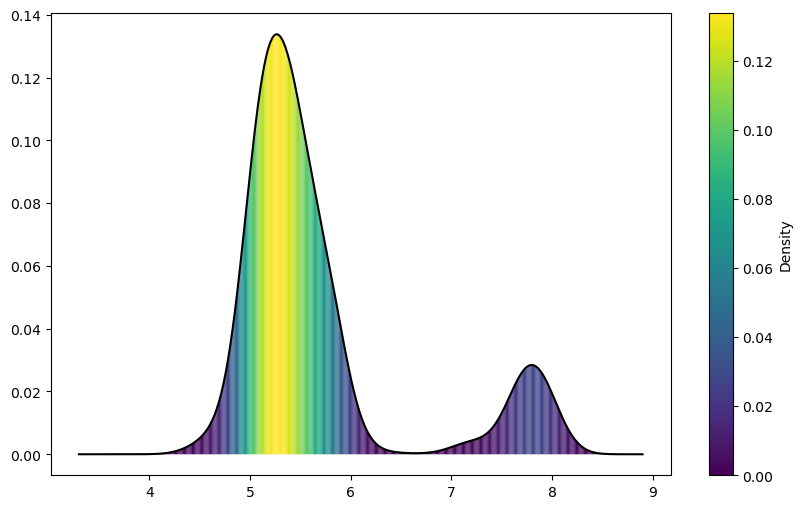

In [76]:
# Uncomment and complete next line with you function to plot the conditional density evaluation for y = 4
# points = your_functinon(...)

# density_x_given_y = density_eval1d(density, points)
# plot_density1d(points[0], density_x_given_y)




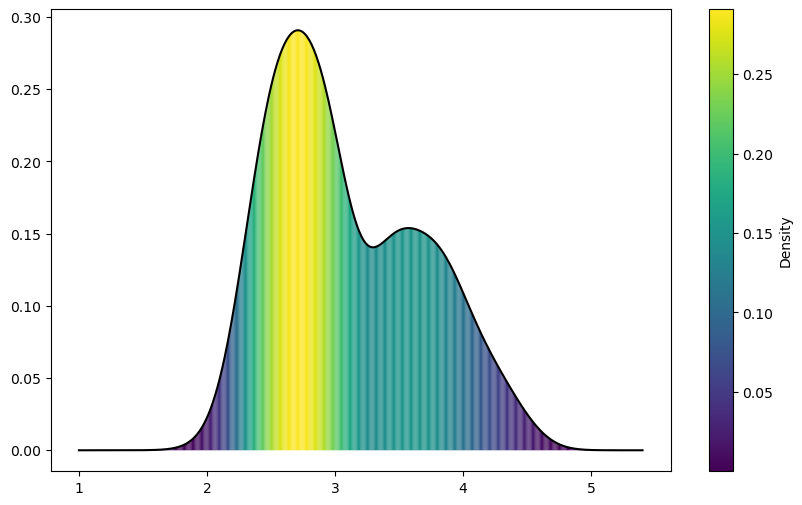

In [77]:
# Uncomment and complete with you function to plot the conditional density evaluation for x = 5.5

# points = your_functinon(...)

# density_y_given_x = density_eval1d(density, points)
# plot_density1d(points[1], density_y_given_x)


Again, we only have evaluation of the density for some point. We now want to have proper probability functions.
First, write a function to approximate the marginal density at the conditioning point. $p(y)$ for $y = 4$ and $p(x)$ for $x = 5.5$
Use your function to get the evaluation of the marginal. 

In [27]:
def my_function_2(density: np.ndarray, x: float = None, y: float = None) -> float:
    if x != None:
        return density[x, :].sum()
    if y != None:
        return density[:, y].sum()
    
print(my_function_2(p_xy, x=5.5))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [78]:
# Write your function here.


(0.38702672154049955, 0.13243228377894617)

_Explain here what you have done_

...

...

Finally, use the marginals and the evaluations of the densities to plot the approximations of the conditional probability density functions. 
Verify that they are, indeed, probability functions. Explain. 

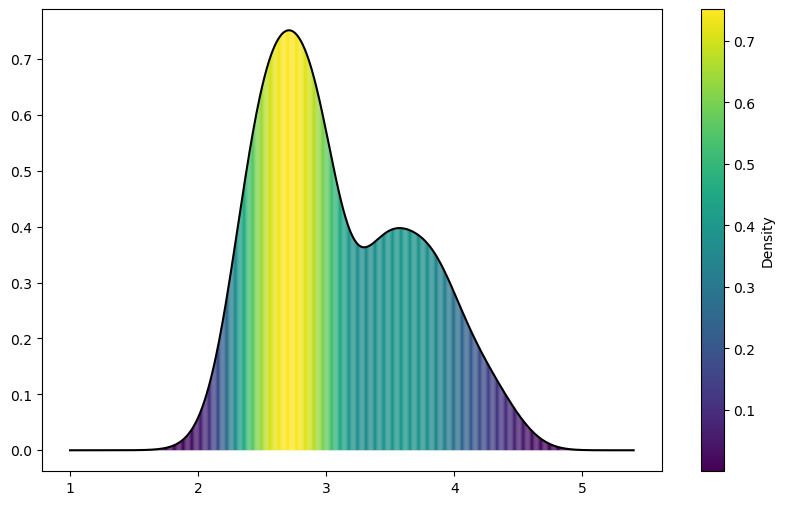

1.0

In [79]:
# Your code here (for p(y|x))


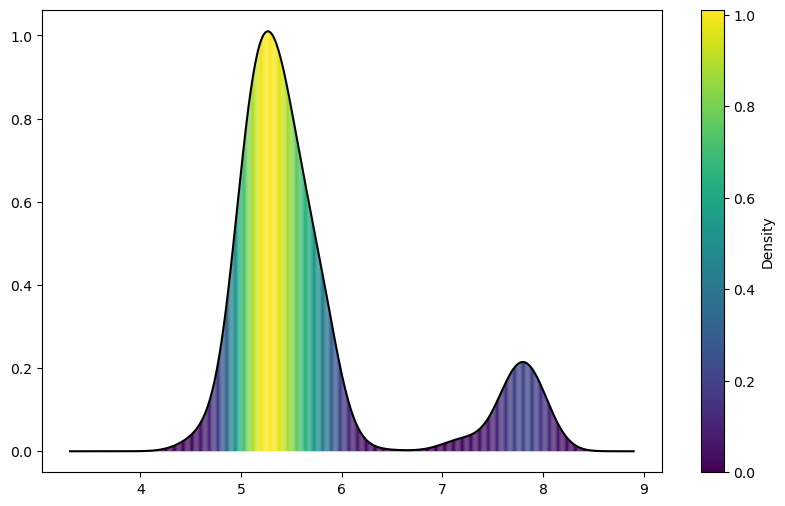

1.0000000000000002

In [80]:
# Your code here (for p(x|y))
    

_Explain here_